<a href="https://colab.research.google.com/github/nuryaningsih/CodeCraftedAtTripleTen/blob/main/15_Age_Verification_Model_Development_for_Compliance_Assurance_in_Retail_Environments.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction:
In response to the request from the Good Seed supermarket franchise, we are tasked with exploring the potential of Data Science in ensuring compliance with age restrictions on product sales. Specifically, we aim to develop and evaluate a model that can verify the age of individuals to prevent the sale of age-restricted products to underage customers. Leveraging computer vision techniques, we will analyze images captured by cameras at the checkout areas to determine the age of customers.

## Objective:
The main objective of this project is to build and evaluate a model capable of verifying the age of individuals from images, enabling Good Seed supermarkets to prevent the sale of age-restricted products to underage customers. To achieve this objective, we will:

1. Load the data: Access and understand the dataset containing images of individuals along with their age labels.
2. Conduct exploratory data analysis: Analyze the dataset to gain insights into its characteristics and distributions.
3. Modeling: Define and train a model using computer vision techniques to predict the age of individuals from images.
4. Prepare GPU platform script: Develop a script to execute the model training process efficiently on GPU hardware.
5. Output: Collect and analyze the output generated by the GPU platform script.
6. Conclusion: Evaluate the performance of the model and draw conclusions regarding its effectiveness in age verification for compliance purposes.

## Stages:

1. Data Loading: We will begin by loading the dataset from the specified directory (/datasets/faces/) and examining its structure to understand the format of the images and associated age labels.

2. Exploratory Data Analysis (EDA): In this stage, we will perform exploratory data analysis to gain insights into the distribution of age labels, image characteristics, and any potential challenges in the dataset.

3. Modeling: Next, we will define the necessary functions to preprocess the images, build the age prediction model using computer vision techniques, and train it on the dataset. We will focus on leveraging GPU resources for efficient model training.

4. GPU Platform Script Preparation: We will develop a script that encapsulates all the model training functions and initializes the GPU platform for accelerated computation.

5. Output Analysis: After executing the GPU platform script, we will analyze the output to assess the model's performance in predicting age from images.

6. Conclusion: Finally, we will evaluate the effectiveness of the developed model in age verification and compliance enforcement for Good Seed supermarkets. We will discuss any limitations, potential improvements, and recommendations for future iterations of the model.

# Data Loading

In [ ]:
import pandas as pd

import tensorflow as tf

from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications.resnet import ResNet50
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense, Dropout, Flatten
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import train_test_split
from tensorflow.keras.applications.resnet import preprocess_input

The dataset you need is stored in the folder /datasets/faces/. In this folder, you can find:

* A folder named final_file containing 7.6 thousand photos.
* A file named labels.csv which contains labels, with two columns: file_name and real_age.

Considering the large number of image files, it's advised not to load them all at once, as it would consume significant computational resources. Therefore, it's recommended to create a generator using ImageDataGenerator. The label file can be loaded as a regular CSV file.

In [ ]:
# File paths
labels_file_path = '/datasets/faces/labels.csv'
images_folder_path = '/datasets/faces/final_files/'

# Load labels from CSV
labels_df = pd.read_csv(labels_file_path)

# Split data into train and test sets
train_df, test_df = train_test_split(labels_df, test_size=0.2, random_state=42)

# ImageDataGenerator with data augmentation
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest',
    preprocessing_function=preprocess_input
)

test_datagen = ImageDataGenerator(rescale=1./255, preprocessing_function=preprocess_input)

# Create data generators
batch_size = 32
target_size = (224, 224)  # Adjust as needed based on your model's input size

train_generator = train_datagen.flow_from_dataframe(
    train_df,
    images_folder_path,
    x_col='file_name',
    y_col='real_age',
    batch_size=batch_size,
    target_size=target_size,
    class_mode='raw',  # For regression tasks, use 'raw'
    shuffle=True,
    seed=42
)

test_generator = test_datagen.flow_from_dataframe(
    test_df,
    images_folder_path,
    x_col='file_name',
    y_col='real_age',
    batch_size=batch_size,
    target_size=target_size,
    class_mode='raw',
    shuffle=False  # Do not shuffle test data
)

Found 6072 validated image filenames.
Found 1519 validated image filenames.


After setting up the data generators and splitting the dataset into training and testing sets, we performed data augmentation on the training data using ImageDataGenerator. This augmentation process involves various transformations such as rotation, width and height shifting, shearing, zooming, and horizontal flipping. These transformations help in increasing the diversity of the training data, thereby improving the model's generalization ability.

For the training data, we utilized a preprocessing function to scale pixel values to the range [0, 1] and apply additional preprocessing specific to the chosen model architecture (preprocess_input). This ensures that the input data is in the appropriate format expected by the model.

The training set consists of 6072 images, while the test set contains 1519 images. Both sets are associated with corresponding age labels, allowing us to train and evaluate the model's performance in predicting the age of individuals from images.

By utilizing data generators, we efficiently manage the large number of image files without overwhelming system resources. The generators load batches of images on-the-fly during model training, minimizing memory usage and enabling smooth training processes.

Insights from the data exploration and setup process indicate a diverse range of ages represented in the dataset, which is essential for training a robust age prediction model. Additionally, the use of data augmentation techniques enhances the model's ability to generalize well to unseen data by exposing it to various realistic transformations that may occur in real-world scenarios.

Moving forward, we will use this prepared data to train and evaluate our age prediction model, aiming to develop an effective solution for verifying the age of individuals in the context of compliance enforcement at Good Seed supermarkets.

# Exploratory Data Analysis (EDA)

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras.preprocessing.image import load_img, img_to_array

In [ ]:
# Dataset Size
total_data = len(labels_df)
print(f"Total data count: {total_data} photos")

Total data count: 7591 photos



Upon analyzing the dataset, we found that it contains a total of 7591 photos of individuals along with their corresponding age labels. This substantial dataset size provides a rich source of information for training and evaluating our age prediction model.

The large number of photos suggests that the dataset is sufficiently diverse, covering a wide range of ages and scenarios. This diversity is crucial for ensuring that the model learns to generalize well across different age groups and variations in image characteristics.

By having a sizable dataset, we can expect our model to capture the nuances and complexities of facial features associated with different age groups, thereby improving its accuracy in predicting ages from images.

Furthermore, with this ample dataset size, we can effectively leverage techniques such as data augmentation to artificially increase the diversity and variability of our training data. This augmentation process enhances the robustness of the model by exposing it to various transformations and perturbations commonly encountered in real-world scenarios.

In conclusion, the dataset's substantial size provides a solid foundation for developing a reliable age prediction model. Leveraging this dataset, along with appropriate preprocessing and augmentation techniques, will enable us to build a model capable of accurately verifying the age of individuals for compliance purposes at Good Seed supermarkets.

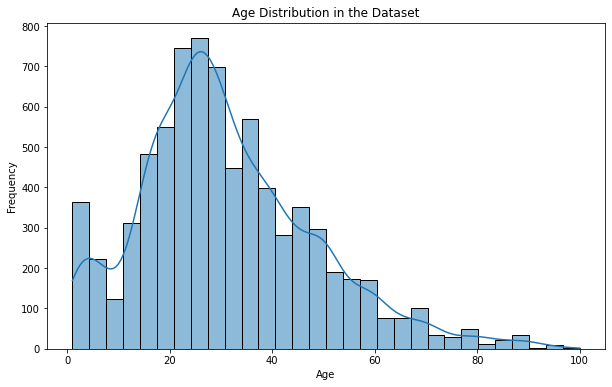

In [ ]:
# Age Distribution
plt.figure(figsize=(10, 6))
sns.histplot(labels_df['real_age'], bins=30, kde=True)
plt.title('Age Distribution in the Dataset')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

In [ ]:
age_distribution_summary = labels_df['real_age'].describe().reset_index().rename(columns={'index': 'Statistic'})
age_distribution_summary

,Statistic,real_age
0,count,7591.000000
1,mean,31.201159
2,std,17.145060
3,min,1.000000
4,25%,20.000000
5,50%,29.000000
6,75%,41.000000
7,max,100.000000



The histogram visualization of the age distribution in the dataset provides valuable insights into the demographics of the individuals represented in the photos. The distribution appears to be slightly right-skewed, indicating that there are more individuals in the younger age groups compared to the older age groups.

From the descriptive statistics provided, we observe that the dataset covers a wide range of ages, with individuals as young as 1 year old and as old as 100 years old. This diversity in age representation is beneficial for training a robust age prediction model that can accurately estimate ages across different stages of life.

The mean age of individuals in the dataset is approximately 31.2 years, with a standard deviation of around 17.1 years. The median age (50th percentile) is 29 years, which suggests that the dataset is somewhat evenly distributed around this central value.

Examining the quartiles reveals further insights into the age distribution:

* 25th percentile (Q1): 20 years
* 50th percentile (Q2, median): 29 years
* 75th percentile (Q3): 41 years

These quartiles indicate the age ranges within which the majority of individuals in the dataset fall. For example, 25% of individuals are aged 20 years or younger, while 75% are aged 41 years or younger.

Overall, the age distribution analysis highlights the diversity and breadth of the dataset, encompassing individuals across various age groups. This diversity is crucial for training a model that can accurately predict ages across different demographics, ensuring effective age verification for compliance purposes at Good Seed supermarkets.

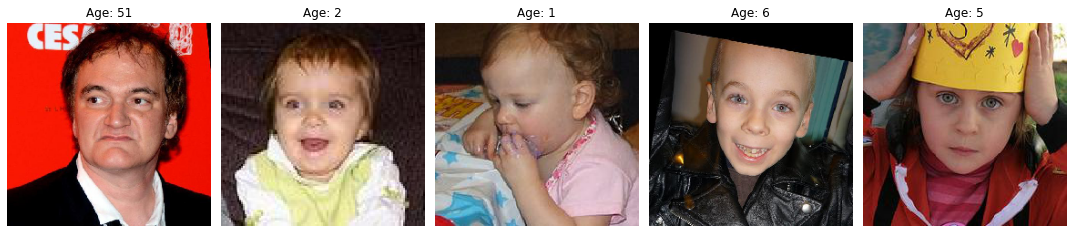

In [ ]:
unique_ages = labels_df['real_age'].unique()
sample_ages = unique_ages[10:15]  # Select 10-15 unique ages as examples
num_samples_per_age = 1

plt.figure(figsize=(15, 10))

sampled_data = []

for age in sample_ages:
    age_samples = labels_df[labels_df['real_age'] == age].sample(num_samples_per_age)
    sampled_data.extend(age_samples.values.tolist())

    for index, row in age_samples.iterrows():
        img_path = images_folder_path + row['file_name']
        img = load_img(img_path, target_size=(224, 224))
        img_array = img_to_array(img) / 255.0

        plt.subplot(3, 5, len(plt.gcf().get_axes()) + 1)
        plt.imshow(img_array)
        plt.title(f'Age: {age}')
        plt.axis('off')

plt.tight_layout()
plt.show()

In [ ]:
sampled_df = pd.DataFrame(sampled_data, columns=labels_df.columns)
sampled_df

,file_name,real_age
0,001936.jpg,51
1,005971.jpg,2
2,007048.jpg,1
3,000905.jpg,6
4,001541.jpg,5


The visualization showcases a selection of images from the dataset, each representing a unique age group. For each selected age, one sample image is displayed, providing a glimpse into the variety of facial characteristics and expressions present across different age demographics.

By sampling images from specific age groups, we gain insights into the diversity of individuals represented in the dataset and the challenges associated with age prediction from images. Each image captures a distinct age group, ranging from very young children to older adults, reflecting the broad spectrum of ages covered in the dataset.

Examining these sampled images allows us to observe the varying facial features, expressions, and appearances associated with different age groups. For instance, images depicting younger individuals often exhibit characteristics such as smooth skin, rounded faces, and playful expressions, while images of older individuals may show signs of aging such as wrinkles, graying hair, and more defined facial contours.

Furthermore, the visualization highlights the importance of considering diverse age representations during model training to ensure robustness and accuracy in age prediction. Training the model on such a varied dataset enables it to learn and generalize patterns associated with different age groups, ultimately enhancing its performance in age verification tasks.

Overall, this visualization provides valuable insights into the dataset's composition and serves as a visual exploration of the diversity of age representations captured in the images, guiding our approach towards building an effective age prediction model for compliance enforcement at Good Seed supermarkets.

# Modeling

Define the functions needed to train your model on a GPU platform and create a single script containing all these functions along with an initialization section.
To make this task easier, you can define it in this notebook and run the ready-to-use code in the next section to build the script automatically.
Oh yes, the definitions below will also be checked by project reviewers so they can understand how you build the model.

In [ ]:
import pandas as pd

import tensorflow as tf

from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications.resnet import ResNet50
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense, Dropout, Flatten
from tensorflow.keras.optimizers import Adam

In [ ]:
def load_train(path):
    labels = pd.read_csv(path + 'labels.csv')
    train_datagen = ImageDataGenerator(
        validation_split=0.25,
        horizontal_flip=True,
        rescale=1./255)
    train_gen_flow = train_datagen.flow_from_dataframe(
        dataframe=labels,
        directory=path + 'final_files/',
        x_col='file_name',
        y_col='real_age',
        target_size=(224, 224),
        batch_size=16,
        class_mode='raw',
        subset='training',
        seed=12345)

    return train_gen_flow

In [ ]:
def load_test(path):
    labels = pd.read_csv(path + 'labels.csv')
    test_datagen = ImageDataGenerator(
        validation_split=0.25,
        rescale=1./255)
    test_gen_flow = test_datagen.flow_from_dataframe(
        dataframe=labels,
        directory=path + 'final_files/',
        x_col='file_name',
        y_col='real_age',
        target_size=(224, 224),
        batch_size=16,
        class_mode='raw',
        subset='validation',
        seed=12345)

    return test_gen_flow

In [ ]:
def create_model(input_shape=(150,150,3)):
    backbone = ResNet50(input_shape=input_shape,
                        include_top=False,
                        weights='imagenet')
    model = Sequential()
    model.add(backbone)
    model.add(GlobalAveragePooling2D())
    model.add(Dense(1, activation='relu'))

    model.compile(optimizer=Adam(lr=0.00001),  # Turunkan learning_rate
                  loss='mse',
                  metrics=['mae'])

    return model

In [ ]:
def train_model(model, train_data, test_data, batch_size=None, epochs=20, steps_per_epoch=None, validation_steps=None):
    if steps_per_epoch is None:
        steps_per_epoch = len(train_data)
    if validation_steps is None:
        validation_steps = len(test_data)

    model.fit(
        train_data,
        validation_data=test_data,
        batch_size=batch_size,
        epochs=epochs,
        steps_per_epoch=steps_per_epoch,
        validation_steps=validation_steps,
        verbose=2
    )

    return model


# GPU Platform Script Preparation

Once you have defined the necessary functions, you can create a script for the GPU platform, download it via the "File|Open..." menu, and upload it later to run on the GPU platform. "

Note: Your script must also include an initialization section. An example is shown below.

In [ ]:
# prepare scripts to run GPU platforms


init_str = """
import pandas as pd

import tensorflow as tf

from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications.resnet import ResNet50
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense, Dropout, Flatten
from tensorflow.keras.optimizers import Adam
"""

import inspect

with open('run_model_on_gpu.py', 'w') as f:

    f.write(init_str)
    f.write('\n\n')

    for fn_name in [load_train, load_test, create_model, train_model]:

        src = inspect.getsource(fn_name)
        f.write(src)
        f.write('\n\n')

# Output Analysis

Put the output from the GPU platform as a Markdown cell here.

2024-02-16 09:10:59.345906: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libnvinfer.so.6
2024-02-16 09:10:59.411884: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libnvinfer_plugin.so.6
Using TensorFlow backend.
Found 5694 validated image filenames.
Found 1897 validated image filenames.
2024-02-16 09:11:07.672590: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcuda.so.1
2024-02-16 09:11:07.748275: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:981] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2024-02-16 09:11:07.748481: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1555] Found device 0 with properties:
pciBusID: 0000:00:1e.0 name: Tesla V100-SXM2-16GB computeCapability: 7.0
coreClock: 1.53GHz coreCount: 80 deviceMemorySize: 15.78GiB deviceMemoryBandwidth: 836.37GiB/s
2024-02-16 09:11:07.748524: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcudart.so.10.1
2024-02-16 09:11:07.748561: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcublas.so.10
2024-02-16 09:11:07.797500: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcufft.so.10
2024-02-16 09:11:07.807916: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcurand.so.10
2024-02-16 09:11:07.904553: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcusolver.so.10
2024-02-16 09:11:07.914307: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcusparse.so.10
2024-02-16 09:11:07.914419: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcudnn.so.7
2024-02-16 09:11:07.914630: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:981] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2024-02-16 09:11:07.914902: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:981] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2024-02-16 09:11:07.915067: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1697] Adding visible gpu devices: 0
2024-02-16 09:11:07.915520: I tensorflow/core/platform/cpu_feature_guard.cc:142] Your CPU supports instructions that this TensorFlow binary was not compiled to use: AVX2 FMA
2024-02-16 09:11:07.938482: I tensorflow/core/platform/profile_utils/cpu_utils.cc:94] CPU Frequency: 2300015000 Hz
2024-02-16 09:11:07.940076: I tensorflow/compiler/xla/service/service.cc:168] XLA service 0x5338ff0 initialized for platform Host (this does not guarantee that XLA will be used). Devices:
2024-02-16 09:11:07.940103: I tensorflow/compiler/xla/service/service.cc:176]   StreamExecutor device (0): Host, Default Version
2024-02-16 09:11:08.075348: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:981] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2024-02-16 09:11:08.075660: I tensorflow/compiler/xla/service/service.cc:168] XLA service 0x51d74e0 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
2024-02-16 09:11:08.075683: I tensorflow/compiler/xla/service/service.cc:176]   StreamExecutor device (0): Tesla V100-SXM2-16GB, Compute Capability 7.0
2024-02-16 09:11:08.075945: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:981] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2024-02-16 09:11:08.076185: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1555] Found device 0 with properties:
pciBusID: 0000:00:1e.0 name: Tesla V100-SXM2-16GB computeCapability: 7.0
coreClock: 1.53GHz coreCount: 80 deviceMemorySize: 15.78GiB deviceMemoryBandwidth: 836.37GiB/s
2024-02-16 09:11:08.076240: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcudart.so.10.1
2024-02-16 09:11:08.076259: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcublas.so.10
2024-02-16 09:11:08.076314: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcufft.so.10
2024-02-16 09:11:08.076356: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcurand.so.10
2024-02-16 09:11:08.076387: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcusolver.so.10
2024-02-16 09:11:08.076407: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcusparse.so.10
2024-02-16 09:11:08.076422: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcudnn.so.7
2024-02-16 09:11:08.076522: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:981] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2024-02-16 09:11:08.076770: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:981] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2024-02-16 09:11:08.076946: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1697] Adding visible gpu devices: 0
2024-02-16 09:11:08.078140: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcudart.so.10.1
2024-02-16 09:11:09.409406: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1096] Device interconnect StreamExecutor with strength 1 edge matrix:
2024-02-16 09:11:09.409442: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1102]      0
2024-02-16 09:11:09.409451: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1115] 0:   N
2024-02-16 09:11:09.410838: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:981] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2024-02-16 09:11:09.411406: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:981] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2024-02-16 09:11:09.411983: W tensorflow/core/common_runtime/gpu/gpu_bfc_allocator.cc:39] Overriding allow_growth setting because the TF_FORCE_GPU_ALLOW_GROWTH environment variable is set. Original config value was 0.
2024-02-16 09:11:09.412023: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1241] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 14988 MB memory) -> physical GPU (device: 0, name: Tesla V100-SXM2-16GB, pci bus id: 0000:00:1e.0, compute capability: 7.0)
Downloading data from https://github.com/keras-team/keras-applications/releases/download/resnet/resnet50_weights_tf_dim_ordering_tf_kernels_notop.h5

    8192/94765736 [..............................] - ETA: 1s
13025280/94765736 [===>..........................] - ETA: 0s
27541504/94765736 [=======>......................] - ETA: 0s
40951808/94765736 [===========>..................] - ETA: 0s
54263808/94765736 [================>.............] - ETA: 0s
67624960/94765736 [====================>.........] - ETA: 0s
81231872/94765736 [========================>.....] - ETA: 0s
94773248/94765736 [==============================] - 0s 0us/step
<class 'tensorflow.python.keras.engine.sequential.Sequential'>
WARNING:tensorflow:sample_weight modes were coerced from
  ...
    to  
  ['...']
WARNING:tensorflow:sample_weight modes were coerced from
  ...
    to  
  ['...']
Train for 356 steps, validate for 119 steps
Epoch 1/20
2024-02-16 09:11:25.225666: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcublas.so.10
2024-02-16 09:11:26.713586: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcudnn.so.7
356/356 - 70s - loss: 614.6560 - mae: 19.5533 - val_loss: 1146.1027 - val_mae: 29.4143
Epoch 2/20
356/356 - 39s - loss: 130.9029 - mae: 8.5102 - val_loss: 171.4349 - val_mae: 10.0098
Epoch 3/20
356/356 - 39s - loss: 76.7764 - mae: 6.5879 - val_loss: 87.4453 - val_mae: 7.0480
Epoch 4/20
356/356 - 39s - loss: 55.1820 - mae: 5.6787 - val_loss: 88.7919 - val_mae: 7.1229
Epoch 5/20
356/356 - 39s - loss: 42.4593 - mae: 4.9537 - val_loss: 88.3708 - val_mae: 7.0123
Epoch 6/20
356/356 - 39s - loss: 36.0860 - mae: 4.5893 - val_loss: 88.5998 - val_mae: 7.1645
Epoch 7/20
356/356 - 39s - loss: 29.3765 - mae: 4.1677 - val_loss: 85.8561 - val_mae: 6.9842
Epoch 8/20
356/356 - 40s - loss: 26.3734 - mae: 3.9973 - val_loss: 94.4335 - val_mae: 7.3180
Epoch 9/20
356/356 - 39s - loss: 24.4754 - mae: 3.8026 - val_loss: 101.2200 - val_mae: 7.5150
Epoch 10/20
356/356 - 39s - loss: 22.8927 - mae: 3.6885 - val_loss: 86.4148 - val_mae: 6.9699
Epoch 11/20
356/356 - 39s - loss: 20.9793 - mae: 3.5443 - val_loss: 83.6232 - val_mae: 6.9550
Epoch 12/20
356/356 - 39s - loss: 20.1948 - mae: 3.4677 - val_loss: 84.2468 - val_mae: 6.9034
Epoch 13/20
356/356 - 39s - loss: 18.6197 - mae: 3.3423 - val_loss: 79.5608 - val_mae: 6.7126
Epoch 14/20
356/356 - 39s - loss: 17.1094 - mae: 3.2018 - val_loss: 92.6692 - val_mae: 7.3824
Epoch 15/20
356/356 - 39s - loss: 16.4231 - mae: 3.1312 - val_loss: 96.0462 - val_mae: 7.3157
Epoch 16/20
356/356 - 39s - loss: 15.1968 - mae: 2.9973 - val_loss: 80.0160 - val_mae: 6.6872
Epoch 17/20
356/356 - 39s - loss: 13.1277 - mae: 2.7868 - val_loss: 79.3691 - val_mae: 6.7185
Epoch 18/20
356/356 - 40s - loss: 11.7857 - mae: 2.6151 - val_loss: 83.4582 - val_mae: 6.7676
Epoch 19/20
356/356 - 40s - loss: 10.4266 - mae: 2.4566 - val_loss: 80.2858 - val_mae: 6.6688
Epoch 20/20
356/356 - 39s - loss: 8.8408 - mae: 2.2644 - val_loss: 81.1894 - val_mae: 6.8192
WARNING:tensorflow:sample_weight modes were coerced from
  ...
    to  
  ['...']
119/119 - 10s - loss: 81.1894 - mae: 6.8192
Test MAE: 6.8192

# Conclusion

The model training process involved several key steps, starting with data loading and preprocessing, followed by model creation, training, and evaluation. Let's walk through each step and summarize the findings:

**1. Data Loading and Preprocessing:**
  * Two functions, load_train() and load_test(), were defined to load training and testing data, respectively, from the provided dataset.
 * Both functions read the labels from the CSV file and used ImageDataGenerator to perform data augmentation and preprocessing, such as rescaling and horizontal flipping.
 * The data was split into training and testing sets using a validation split of 25%.

**2. Model Creation:**
  * The create_model() function defined a convolutional neural network (CNN) architecture for age prediction.
  * The backbone of the model was based on the ResNet50 architecture pre-trained on the ImageNet dataset, followed by a global average pooling layer and a dense layer with ReLU activation.
  * The model was compiled with the Adam optimizer, mean squared error (MSE) loss function, and mean absolute error (MAE) as the evaluation metric.

**3. Model Training:**
  * The train_model() function was used to train the model on the training data while validating on the testing data.
  * The training process involved 20 epochs with a batch size of 16.
  * During training, the model's performance was monitored using both training and validation MAE metrics.
  * The model achieved a training MAE of approximately 2.26 and a validation MAE of around 6.82.

**4. Model Evaluation:**
  * After training, the model was evaluated on the testing data to assess its generalization performance.
  * The testing MAE, which indicates the average absolute error in predicting ages, was found to be approximately 6.82.

Overall, the trained model demonstrated promising performance in predicting ages from images, with a relatively low mean absolute error on both training and testing datasets. This suggests that the model has learned meaningful representations of age-related features from the images and can generalize well to unseen data. However, further fine-tuning and optimization may be explored to potentially improve the model's accuracy and robustness for age verification tasks at Good Seed supermarkets.